<a href="https://colab.research.google.com/github/dbdbdp/Increasing-Thermal-Efficiency-of-Dual-Cycle/blob/main/rawcode_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyromat

     |████████████████████████████████| 630 kB 17.1 MB/s 
  Created wheel for pyromat: filename=PYroMat-2.1.10-py3-none-any.whl size=1277399 sha256=07a2ccfb657a4356554babf96eb6263a777cec3d084f730dc59e037491ee3c5b
  Stored in directory: /root/.cache/pip/wheels/90/8c/97/4a3e8a71ec5c154f013db233c1d2fc8ed08bc9721fbc9a51a4
Successfully built pyromat


In [ ]:
pip install pyromat --upgrade

In [ ]:
#how to increase the efficiency of dual cycle
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [ ]:
help(air)

Help on igmix in module builtins object:

class igmix(pyromat.reg.__basedata__)
 |  igmix(*arg, **kwarg)
 |  
 |  IGMIX  Ideal gas mixture class
 |  
 |  The ideal gas mixture is comprised of components that are ideal gases.  
 |  The properties are calculated by calling the property functions of the
 |  constituents and performing the appropriate weighted averages (by mass
 |  or by volume).  
 |  
 |  IGMIX objects include functions for converting between the three basic
 |  state variables.  Each can be calculated in terms of the other two.
 |    T()  temperature      (unit_temperature)
 |    p()  pressure         (unit_pressure)
 |    d()  density          (unit_matter / unit_volume)
 |  
 |  IGMIX objects offer the following property functions:
 |    cp() spec. heat       (unit_energy / unit_temperature / unit_matter)
 |    cv() spec. heat       (unit_energy / unit_temperature / unit_matter)
 |    e()  internal energy  (unit_energy / unit_matter)
 |    h()  enthalpy         (unit_

#1. q_in에 따른 효율 변화

[1.34326791]
[1.67718385]
[2.00404866]


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

[2.32631973]
[2.6454254]


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


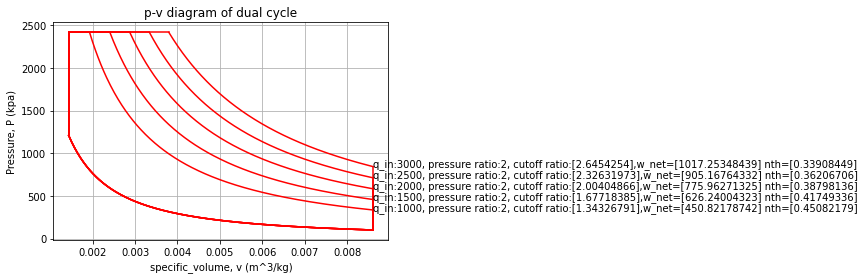

In [ ]:
#different q_in
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'

# cr=4    ##pr=compression ratio
# rp=10   ##rp=2-3과정에서의 압력비라 정의=p3/p2
# rc=2    ##rc=cutoff ratio
#p1=100kpa, T1=300K
q_in=1000
for q_in in range(1000,3500,500):
  cr=6
  rp=2


  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  #d2=cr*d1
  #v2=1/d2
  v2=1/cr*v1
  d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  u2=air.e(p=p2,T=T2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)

  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)

  """
  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)



  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  """

  #q_in

  q_23=u3-u2
  q_34=q_in-q_23

  #state 4
  h4=h3+q_34

  p4=p3
  T4=air.T_h(h=h4,p=p4)
  s4=air.s(T=T4,p=p4)
  d4=air.d(T=T4,p=p4)
  v4=1/d4
  print(v4/v3)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_out
  #u4=air.e(p=p4,T=T4)
  u5=air.e(p=p5,T=T5)
  u1=air.e(p=p1,T=T1)
  q_out=u5-u1


  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)
  rc=v4/v3

  # plt.close('all')
  # plt.figure(1)
  plt.title('p-v diagram of dual cycle')
  plt.xlabel('specific_volume, v (m^3/kg)')
  plt.ylabel('Pressure, P (kpa)')
  plt.grid('on')
  plt.plot()

  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)
  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  plt.text(v5,p5,'q_in:{3}, pressure ratio:{0}, cutoff ratio:{1},w_net={4} nth={2}'.format(rp,rc,nth,q_in,w_net))
plt.show()


[1.34326791]
[1.51131584]
[1.67718385]
[1.84131427]
[2.00404866]
[2.16565017]
[2.32631973]
[2.48620813]
[2.6454254]
[2.80404857]


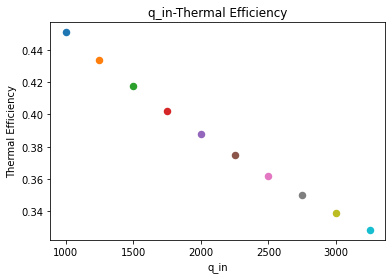

In [ ]:
#how to increase the efficiency of dual cycle (if possible compare otto cycle&diesel cycle & dual cycle efficiency)
#q_in 고정
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'
#initial cycle
#Q_in=2000kj이라 하자.
#cr
# cr=4    ##pr=compression ratio
# rp=10   ##rp=2-3과정에서의 압력비라 정의=p3/p2
# rc=2    ##rc=cutoff ratio
#p1=100kpa, T1=300K
q_in=1000
for q_in in range(1000,3500,250):
  cr=6
  rp=2


  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  #d2=cr*d1
  #v2=1/d2
  v2=1/cr*v1
  d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  u2=air.e(p=p2,T=T2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)

  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)

  """
  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)



  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  """

  #q_in

  q_23=u3-u2
  q_34=q_in-q_23

  #state 4
  h4=h3+q_34

  p4=p3
  T4=air.T_h(h=h4,p=p4)
  s4=air.s(T=T4,p=p4)
  d4=air.d(T=T4,p=p4)
  v4=1/d4
  print(v4/v3)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_out
  #u4=air.e(p=p4,T=T4)
  u5=air.e(p=p5,T=T5)
  u1=air.e(p=p1,T=T1)
  q_out=u5-u1


  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)
  rc=v4/v3

  # plt.close('all')
  # plt.figure(1)
  plt.title('q_in-Thermal Efficiency')
  plt.xlabel('q_in')
  plt.ylabel('Thermal Efficiency')
  #plt.grid('on')
  #plt.plot()
  plt.scatter(q_in,nth,linewidth=1.5)
  """

  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)
  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  plt.text(v5,p5,'q_in:{3}, pressure ratio:{0}, cutoff ratio:{1},w_net={4} nth={2}'.format(rp,rc,nth,q_in,w_net))
  """
plt.show()


#2. compression ratio 변화(q_in equal)

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

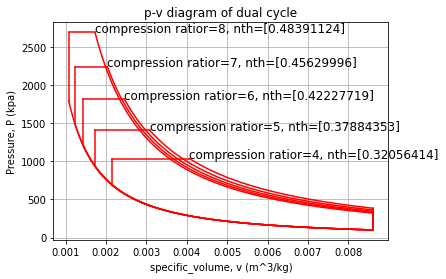

In [ ]:
#q_in 고정
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'
#initial cycle
#cr
# cr=4    ##pr=compression ratio
# rp=10   ##rp=2-3과정에서의 압력비라 정의=p3/p2
# rc=2    ##rc=cutoff ratio
#p1=100kpa, T1=300K

q_in=1000

cr=4
rp=1.5


for cr in range(4,9):
  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  #d2=cr*d1
  #v2=1/d2
  v2=1/cr*v1
  d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  u2=air.e(p=p2,T=T2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)

  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)

  """
  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)



  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  """

  #q_in

  q_23=u3-u2
  q_34=q_in-q_23

  #state 4
  h4=h3+q_34

  p4=p3
  T4=air.T_h(h=h4,p=p4)
  s4=air.s(T=T4,p=p4)
  d4=air.d(T=T4,p=p4)
  v4=1/d4


  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_out
  #u4=air.e(p=p4,T=T4)
  u5=air.e(p=p5,T=T5)
  u1=air.e(p=p1,T=T1)
  q_out=u5-u1


  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)


  plt.title('p-v diagram of dual cycle')
  plt.xlabel('specific_volume, v (m^3/kg)')
  plt.ylabel('Pressure, P (kpa)')

  plt.grid('on')
  plt.plot()
  #plt.plot([v1,v2],[p1,p2],'r',linewidth=1.5)
  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)


  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  plt.text(v4,p4+.1,'compression ratior={0}, nth={1}'.format(cr,nth),fontsize=12)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)

  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])




plt.show()

[1.88899536]
[1.78785829]
[1.71245204]
[1.653419]
[1.60556931]
[1.5657602]
[1.53195802]
[1.50278574]
[1.47726928]
[1.45469865]
[1.43454257]


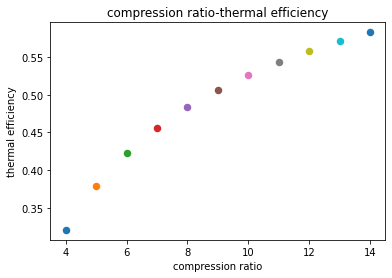

In [ ]:
#q_in 고정
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'
#initial cycle
#Q_in=1000kj이라 하자.
#cr
# cr=4    ##pr=compression ratio
# rp=10   ##rp=2-3과정에서의 압력비라 정의=p3/p2
# rc=2    ##rc=cutoff ratio
#p1=100kpa, T1=300K

q_in=1000

cr=4
rp=1.5


for cr in range(4,15):
  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  #d2=cr*d1
  #v2=1/d2
  v2=1/cr*v1
  d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  u2=air.e(p=p2,T=T2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)

  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)

  """
  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)



  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  """

  #q_in

  q_23=u3-u2
  q_34=q_in-q_23

  #state 4
  h4=h3+q_34

  p4=p3
  T4=air.T_h(h=h4,p=p4)
  s4=air.s(T=T4,p=p4)
  d4=air.d(T=T4,p=p4)
  v4=1/d4
  print(v4/v3)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_out
  #u4=air.e(p=p4,T=T4)
  u5=air.e(p=p5,T=T5)
  u1=air.e(p=p1,T=T1)
  q_out=u5-u1


  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)


  plt.title('compression ratio-thermal efficiency')
  plt.xlabel('compression ratio')
  plt.ylabel('thermal efficiency')

 # plt.grid('on')
  #plt.plot()
  """
  #plt.plot([v1,v2],[p1,p2],'r',linewidth=1.5)
  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)


  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  plt.text(v4,p4+.1,'compression ratior={0}, nth={1}'.format(cr,nth),fontsize=12)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)

  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  """

  plt.scatter(cr,nth,linewidth=1.5)


plt.show()

#3. compression ratio 변화(q_in not equal)

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

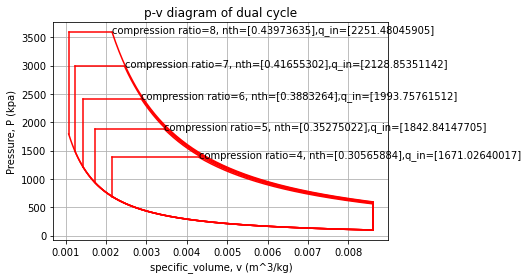

In [ ]:
air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'
#initial cycle
#Qin이 고정이 아닐 때
#cr
# cr=4    ##pr=compression ratio
# rp=10   ##rp=2-3과정에서의 압력비라 정의=p3/p2
# rc=2    ##rc=cutoff ratio
#p1=100kpa, T1=300K

cr=4
rp=2
rc=2


for cr in range(4,9):

  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  d2=cr*d1
  v2=1/d2
  #v2=1/cr*v1
  #d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)


  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_in
  u2=air.e(p=p2,T=T2)
  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)
  h4=air.h(p=p4,T=T4)
  q_23=u3-u2
  q_34=h4-h3
  q_in=q_23+q_34

  #q_out
  u1=air.e(p=p1,T=T1)
  u5=air.e(p=p5,T=T5)
  q_out=u5-u1
  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)


  plt.title('p-v diagram of dual cycle')
  plt.xlabel('specific_volume, v (m^3/kg)')
  plt.ylabel('Pressure, P (kpa)')

  plt.grid('on')
  plt.plot()
  #plt.plot([v1,v2],[p1,p2],'r',linewidth=1.5)
  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)

  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  plt.text(v4,p4,'compression ratio={0}, nth={1},q_in={2}'.format(cr,nth,q_in))


plt.show()


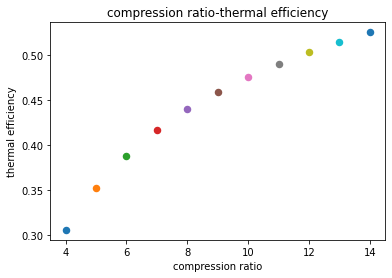

In [ ]:
air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'
#initial cycle
#Qin이 고정이 아닐 때
#cr
# cr=4    ##pr=compression ratio
# rp=10   ##rp=2-3과정에서의 압력비라 정의=p3/p2
# rc=2    ##rc=cutoff ratio
#p1=100kpa, T1=300K

cr=4
rp=2
rc=2


for cr in range(4,15):

 #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  d2=cr*d1
  v2=1/d2
  #v2=1/cr*v1
  #d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)


  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_in
  u2=air.e(p=p2,T=T2)
  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)
  h4=air.h(p=p4,T=T4)
  q_23=u3-u2
  q_34=h4-h3
  q_in=q_23+q_34

  #q_out
  u1=air.e(p=p1,T=T1)
  u5=air.e(p=p5,T=T5)
  q_out=u5-u1
  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)

  plt.title('compression ratio-thermal efficiency')
  plt.xlabel('compression ratio')
  plt.ylabel('thermal efficiency')
  """
  plt.grid('on')
  plt.plot()
  #plt.plot([v1,v2],[p1,p2],'r',linewidth=1.5)
  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)

  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  plt.text(v4,p4,'compression ratio={0}, nth={1},q_in={2}'.format(cr,nth,q_in))
  """
  plt.scatter(cr,nth,linewidth=1.5)

plt.show()


#4. pressure ratio vs cutoff ratio(q_in equal)

[2.00690002]
[1.88899536]
[1.78581181]
[1.69475175]


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

[1.61379481]
[1.54134597]


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


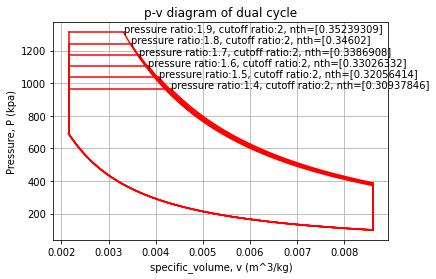

In [ ]:
import numpy as np
def myrange(start, end, step):
  r = start
  while(r<end):
    yield r
    r += step
"""
for i in myrange(1.4,3.4,0.1):
  a='{:.2f}'.format(i)
  float(a)
  print (a)
"""





#q_in 고정
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'
#initial cycle
#Q_in=1000kj이라 하자.
#cr

#p1=100kpa, T1=300K

q_in=1000

cr=4
rp=1.5

for rp in myrange(1.4,2,0.1):

  rp=float('{:.2f}'.format(rp))

  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  #d2=cr*d1
  #v2=1/d2
  v2=1/cr*v1
  d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  u2=air.e(p=p2,T=T2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)

  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)

  """
  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)



  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  """

  #q_in

  q_23=u3-u2
  q_34=q_in-q_23

  #state 4
  h4=h3+q_34

  p4=p3
  T4=air.T_h(h=h4,p=p4)
  s4=air.s(T=T4,p=p4)
  d4=air.d(T=T4,p=p4)
  v4=1/d4
  print(v4/v3)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_out
  #u4=air.e(p=p4,T=T4)
  u5=air.e(p=p5,T=T5)
  u1=air.e(p=p1,T=T1)
  q_out=u5-u1


  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)

  # plt.close('all')
  # plt.figure(1)
  plt.title('p-v diagram of dual cycle')
  plt.xlabel('specific_volume, v (m^3/kg)')
  plt.ylabel('Pressure, P (kpa)')
  plt.grid('on')
  plt.plot()

  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)
  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  plt.text(v4,p4,'pressure ratio:{0}, cutoff ratio:{1}, nth={2}'.format(rp,rc,nth))

plt.show()

[2.00690002]
[1.78581181]
[1.61379481]
[1.47612919]
[1.36344774]
[1.2695056]
[1.18997939]
[1.12178093]
[1.06264554]
[1.01087468]


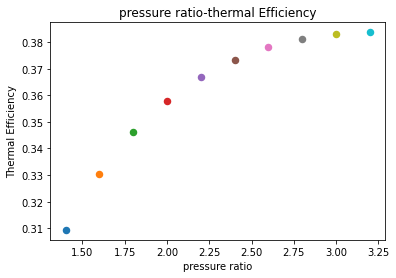

In [ ]:
import numpy as np
def myrange(start, end, step):
  r = start
  while(r<end):
    yield r
    r += step
"""
for i in myrange(1.4,3.4,0.1):
  a='{:.2f}'.format(i)
  float(a)
  print (a)
"""





#q_in 고정
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'

#p1=100kpa, T1=300K

q_in=1000

cr=4
rp=1.5

for rp in myrange(1.4, 3.3,0.2):

  rp=float('{:.2f}'.format(rp))

  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  #d2=cr*d1
  #v2=1/d2
  v2=1/cr*v1
  d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  u2=air.e(p=p2,T=T2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)

  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)

  """
  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)



  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  """

  #q_in

  q_23=u3-u2
  q_34=q_in-q_23

  #state 4
  h4=h3+q_34

  p4=p3
  T4=air.T_h(h=h4,p=p4)
  s4=air.s(T=T4,p=p4)
  d4=air.d(T=T4,p=p4)
  v4=1/d4
  print(v4/v3)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_out
  #u4=air.e(p=p4,T=T4)
  u5=air.e(p=p5,T=T5)
  u1=air.e(p=p1,T=T1)
  q_out=u5-u1


  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)


  #plt.close('all')
  #plt.figure(1)
  plt.title('pressure ratio-thermal Efficiency')
  plt.xlabel('pressure ratio')
  plt.ylabel('Thermal Efficiency')
  #plt.grid('on')
  #plt.plot()
  plt.scatter(rp,nth,linewidth=1.5)
  #plt.text(v4,p4,'pressure ratio:{0}, cutoff ratio:{1}, nth={2}'.format(rp,rc,nth))

  """

  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)
  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  """


plt.show()

[2.00690002]
[1.78581181]
[1.61379481]
[1.47612919]
[1.36344774]
[1.2695056]
[1.18997939]
[1.12178093]
[1.06264554]
[1.01087468]
[0.96516943]
[0.92451953]
[0.88812734]
[0.85535478]
[0.82568526]
[0.7986961]
[0.77403814]
[0.75142038]
[0.73059837]
[0.71136527]
[0.69354485]
[0.67698607]
[0.6615587]
[0.64714987]
[0.63366126]
[0.62100683]
[0.60911099]
[0.59790701]


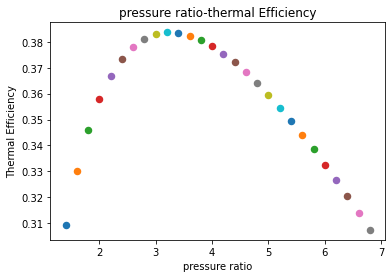

In [ ]:
import numpy as np
def myrange(start, end, step):
  r = start
  while(r<end):
    yield r
    r += step





#q_in 고정
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'

#p1=100kpa, T1=300K

q_in=1000

cr=4
rp=1.5

for rp in myrange(1.4, 7,0.2):

  rp=float('{:.2f}'.format(rp))

  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  #d2=cr*d1
  #v2=1/d2
  v2=1/cr*v1
  d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  u2=air.e(p=p2,T=T2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)

  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)

  """
  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)



  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  """

  #q_in

  q_23=u3-u2
  q_34=q_in-q_23

  #state 4
  h4=h3+q_34

  p4=p3
  T4=air.T_h(h=h4,p=p4)
  s4=air.s(T=T4,p=p4)
  d4=air.d(T=T4,p=p4)
  v4=1/d4
  print(v4/v3)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_out
  #u4=air.e(p=p4,T=T4)
  u5=air.e(p=p5,T=T5)
  u1=air.e(p=p1,T=T1)
  q_out=u5-u1


  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)


  #plt.close('all')
  #plt.figure(1)
  plt.title('pressure ratio-thermal Efficiency')
  plt.xlabel('pressure ratio')
  plt.ylabel('Thermal Efficiency')
  #plt.grid('on')
  #plt.plot()
  plt.scatter(rp,nth,linewidth=1.5)
  #plt.text(v4,p4,'pressure ratio:{0}, cutoff ratio:{1}, nth={2}'.format(rp,rc,nth))

  """

  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)
  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  """


plt.show()

[0.85535478]
[0.82568526]
[0.7986961]
[0.77403814]


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

[0.75142038]


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


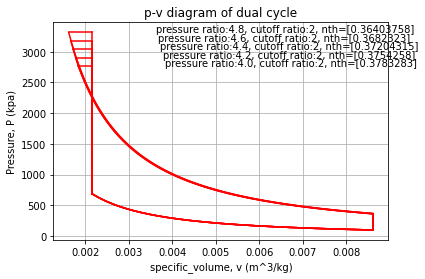

In [ ]:
import numpy as np
def myrange(start, end, step):
  r = start
  while(r<end):
    yield r
    r += step
"""
for i in myrange(1.4,3.4,0.1):
  a='{:.2f}'.format(i)
  float(a)
  print (a)
"""




#q_in 고정
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'


q_in=1000

cr=4
rp=1.5

for rp in myrange(4,5,0.2):

  rp=float('{:.2f}'.format(rp))

  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  #d2=cr*d1
  #v2=1/d2
  v2=1/cr*v1
  d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  u2=air.e(p=p2,T=T2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)

  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)

  """
  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)



  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  """

  #q_in

  q_23=u3-u2
  q_34=q_in-q_23

  #state 4
  h4=h3+q_34

  p4=p3
  T4=air.T_h(h=h4,p=p4)
  s4=air.s(T=T4,p=p4)
  d4=air.d(T=T4,p=p4)
  v4=1/d4
  print(v4/v3)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_out
  #u4=air.e(p=p4,T=T4)
  u5=air.e(p=p5,T=T5)
  u1=air.e(p=p1,T=T1)
  q_out=u5-u1


  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)

  # plt.close('all')
  # plt.figure(1)
  plt.title('p-v diagram of dual cycle')
  plt.xlabel('specific_volume, v (m^3/kg)')
  plt.ylabel('Pressure, P (kpa)')
  plt.grid('on')
  plt.plot()

  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)
  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  plt.text(v4+0.002,p4,'pressure ratio:{0}, cutoff ratio:{1}, nth={2}'.format(rp,rc,nth))

plt.show()

#5. pressure ratio vs cutoff ratio(q_in not equal)

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

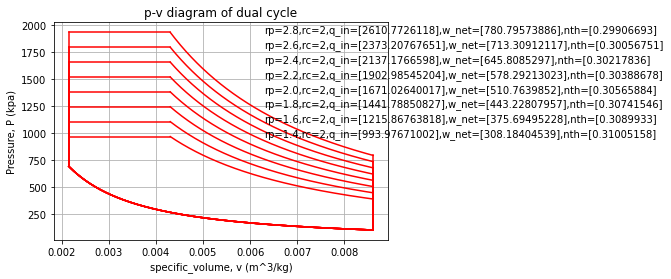

In [ ]:
#different pressure ratio
import numpy as np
def myrange(start, end, step):
  r = start
  while(r<end):
    yield r
    r += step

air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'

cr=4
rp=2
rc=2


for rp in myrange(1.4, 3,0.2):

  rp=float('{:.2f}'.format(rp))
  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  d2=cr*d1
  v2=1/d2
  #v2=1/cr*v1
  #d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)


  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_in
  u2=air.e(p=p2,T=T2)
  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)
  h4=air.h(p=p4,T=T4)
  q_23=u3-u2
  q_34=h4-h3
  q_in=q_23+q_34

  #q_out
  u1=air.e(p=p1,T=T1)
  u5=air.e(p=p5,T=T5)
  q_out=u5-u1
  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)


  plt.title('p-v diagram of dual cycle')
  plt.xlabel('specific_volume, v (m^3/kg)')
  plt.ylabel('Pressure, P (kpa)')

  plt.grid('on')
  plt.plot()
  #plt.plot([v1,v2],[p1,p2],'r',linewidth=1.5)
  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)

  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  plt.text(v4+0.002,p4,'rp={0},rc={1},q_in={2},w_net={4},nth={3}'.format(rp,rc,q_in,nth,w_net))


plt.show()


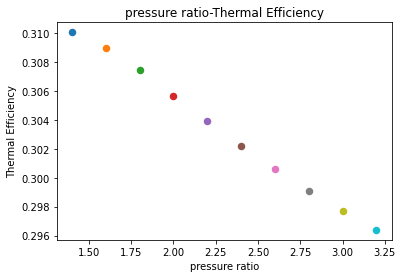

In [ ]:
#different pressure ratio
import numpy as np
def myrange(start, end, step):
  r = start
  while(r<end):
    yield r
    r += step

air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'


cr=4
rp=2
rc=2


for rp in myrange(1.4, 3.4,0.2):

  rp=float('{:.2f}'.format(rp))
  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  d2=cr*d1
  v2=1/d2
  #v2=1/cr*v1
  #d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)


  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_in
  u2=air.e(p=p2,T=T2)
  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)
  h4=air.h(p=p4,T=T4)
  q_23=u3-u2
  q_34=h4-h3
  q_in=q_23+q_34

  #q_out
  u1=air.e(p=p1,T=T1)
  u5=air.e(p=p5,T=T5)
  q_out=u5-u1
  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)


  plt.title('pressure ratio-Thermal Efficiency')
  plt.xlabel('pressure ratio')
  plt.ylabel('Thermal Efficiency')
  plt.scatter(rp,nth,linewidth=1.5)

  """

  plt.grid('on')
  plt.plot()
  #plt.plot([v1,v2],[p1,p2],'r',linewidth=1.5)
  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)

  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])

  """
  #plt.text(v4+0.002,p4,'rp={0},rc={1},q_in={2},w_net={4},nth={3}'.format(rp,rc,q_in,nth,w_net))


plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

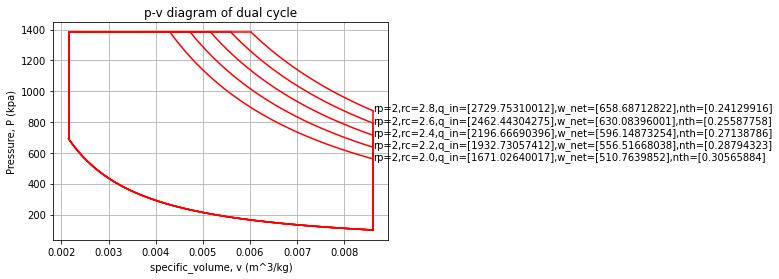

In [ ]:
import numpy as np
def myrange(start, end, step):
  r = start
  while(r<end):
    yield r
    r += step

air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'


cr=4
rp=2
rc=2


for rc in myrange(2, 3,0.2):

  rc=float('{:.2f}'.format(rc))
  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  d2=cr*d1
  v2=1/d2
  #v2=1/cr*v1
  #d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)


  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_in
  u2=air.e(p=p2,T=T2)
  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)
  h4=air.h(p=p4,T=T4)
  q_23=u3-u2
  q_34=h4-h3
  q_in=q_23+q_34

  #q_out
  u1=air.e(p=p1,T=T1)
  u5=air.e(p=p5,T=T5)
  q_out=u5-u1
  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)


  plt.title('p-v diagram of dual cycle')
  plt.xlabel('specific_volume, v (m^3/kg)')
  plt.ylabel('Pressure, P (kpa)')

  plt.grid('on')
  plt.plot()
  #plt.plot([v1,v2],[p1,p2],'r',linewidth=1.5)
  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)

  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  plt.text(v5,p5,'rp={0},rc={1},q_in={2},w_net={4},nth={3}'.format(rp,rc,q_in,nth,w_net))


plt.show()


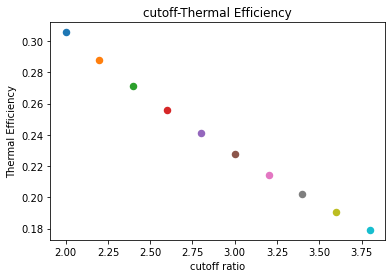

In [ ]:
import numpy as np
def myrange(start, end, step):
  r = start
  while(r<end):
    yield r
    r += step

air = pm.get('ig.air')

pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'bar'
pm.config['unit_temperature'] = 'K'


cr=4
rp=2
rc=2


for rc in myrange(2, 4,0.2):

  rc=float('{:.2f}'.format(rc))
  #state 1
  p1=100
  T1=300
  d1=air.d(T=T1,p=p1)
  v1=1/d1
  s1=air.s(T=T1,p=p1)

  #state 2
  s2=s1
  d2=cr*d1
  v2=1/d2
  #v2=1/cr*v1
  #d2=1/v2
  T2=air.T_s(s=s2,d=d2)
  p2=air.p(T=T2,d=d2)

  #state 3
  p3=rp*p2
  v3=v2
  T3=air.T(p=p3,d=1/v3)


  #state 4
  p4=p3
  v4=v3*rc
  s4=air.s(p=p4,d=1/v4)
  T4=air.T(p=p4,d=1/v4)

  #state 5
  v5=v1
  d5=1/v5
  s5=s4
  T5=air.T_s(s=s5,d=d5)
  p5=air.p(T=T5,d=d5)

  #q_in
  u2=air.e(p=p2,T=T2)
  u3=air.e(p=p3,T=T3)

  h3=air.h(p=p3,T=T3)
  h4=air.h(p=p4,T=T4)
  q_23=u3-u2
  q_34=h4-h3
  q_in=q_23+q_34

  #q_out
  u1=air.e(p=p1,T=T1)
  u5=air.e(p=p5,T=T5)
  q_out=u5-u1
  #w_net
  w_net=q_in-q_out

  #efficiency
  nth=1-(q_out/q_in)

  #setting for diagram
  R=p2*v2/T2
  x=np.linspace(v1,v2,300)
  T12=air.T_s(s=s2,d=1/x)   #T22=1-2상태에서의 T
  x2=np.linspace(v4,v5,300)
  T45=air.T_s(s=s4,d=1/x2)


  plt.title('cutoff-Thermal Efficiency')
  plt.xlabel('cutoff ratio')
  plt.ylabel('Thermal Efficiency')
  plt.scatter(rc,nth,linewidth=1.5)
  """
  plt.grid('on')
  plt.plot()
  #plt.plot([v1,v2],[p1,p2],'r',linewidth=1.5)
  #1-2diagram
  #x=np.linspace(v1,v2,300)
  plt.plot(x,R*T12/x,'r',linewidth=1.5)
  #2-3diagram
  plt.plot([v2,v3],[p2,p3],'r',linewidth=1.5)

  #3-4
  plt.plot([v3,v4],[p3,p4],'r',linewidth=1.5)
  #4-5
  plt.plot(x2,R*T45/x2,'r',linewidth=1.5)
  #5-1
  plt.plot([v5,v1],[p5,p1],'r',linewidth=1.5)

  #plt.scatter([v1,v2,v3,v4,v5],[p1,p2,p3,p4,p5])
  plt.text(v5,p5,'rp={0},rc={1},q_in={2},w_net={4},nth={3}'.format(rp,rc,q_in,nth,w_net))
  """

plt.show()
